In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [2]:
path2root = "../../"
sbj_num = 12
subjects_fol = "subjects/"
sampling_test_fol = "sampling-test/"

In [3]:
sampling_test_dir = path2root + subjects_fol + f"{sbj_num}/" + sampling_test_fol

with open(sampling_test_dir + "t.pickle", 'rb') as f:
    t = pickle.load(f)
with open(sampling_test_dir + "y-hat-boi.pickle", 'rb') as f:
    y_boi = pickle.load(f)
with open(sampling_test_dir + "y-hat-et.pickle", 'rb') as f:
    y_et = pickle.load(f)
    
n_smp = y_et.shape[0]

In [4]:
x = y_et[:, 0]
y = y_et[:, 1]

In [5]:
x_med = signal.medfilt(x, 5)
y_med = signal.medfilt(y, 5)

In [6]:
b, a = signal.butter(8, 0.125)
x_bw = signal.filtfilt(b, a, x, padlen=150)
y_bw = signal.filtfilt(b, a, y, padlen=150)

In [7]:
xdot = x_med.copy()
ydot = y_med.copy()
# xdot[1:] = (x_med[1:] - x_med[:-1]) / (t[1:] - t[:-1]) / 5
# ydot[1:] = (y_med[1:] - y_med[:-1]) / (t[1:] - t[:-1]) / 5
xdot[1:] = (x_med[1:] - x_med[:-1])
ydot[1:] = (y_med[1:] - y_med[:-1])
xdot[0] = xdot[1]
ydot[0] = ydot[1]

In [8]:
xdot2 = x.copy()
ydot2 = y.copy()
# xdot[1:] = (x_med[1:] - x_med[:-1]) / (t[1:] - t[:-1]) / 5
# ydot[1:] = (y_med[1:] - y_med[:-1]) / (t[1:] - t[:-1]) / 5
xdot2[1:] = (x[1:] - x[:-1])
ydot2[1:] = (y[1:] - y[:-1])
xdot2[0] = xdot2[1]
ydot2[0] = ydot2[1]

In [9]:
fps = 25
pick_win = int(fps / 5)

In [10]:
x_picks_smp = []
x_picks = []
xdot_thresh = 0.18
xdot_picks_p = xdot > xdot_thresh
xdot_picks_n = xdot < -xdot_thresh
xdot_picks = xdot_picks_p + xdot_picks_n
xdot_picks[0] = True
xdot_picks[-1] = True
i = 0
while i < n_smp:
    if xdot_picks[i]:
        x_picks_smp.append(i)
        x_picks.append(0)
        for j in range(i+1, i+pick_win):
            if j < n_smp:
                xdot_picks[j] = False
            else:
                break
        i = j
    else:
        i += 1

x_picks_smp = np.array(x_picks_smp)
x_picks = np.array(x_picks)

In [11]:
x_fix_smp = np.array([1])
x_fix = np.array([1])
i = 0
for (i, _) in enumerate(x_picks_smp):
    if i == x_picks_smp.shape[0]-1:
        break
    x_fix_i_smp = np.arange(x_picks_smp[i]+1, x_picks_smp[i+1])
    x_fix_i = np.ones(x_fix_i_smp.shape[0]) * np.mean(x_med[x_fix_i_smp])
    x_fix_smp = np.concatenate((x_fix_smp, x_fix_i_smp))
    x_fix = np.concatenate((x_fix, x_fix_i))

x_fix_smp = x_fix_smp[1:]
x_fix = x_fix[1:]

Text(0, 0.5, 'x (pixel/screen_width)')

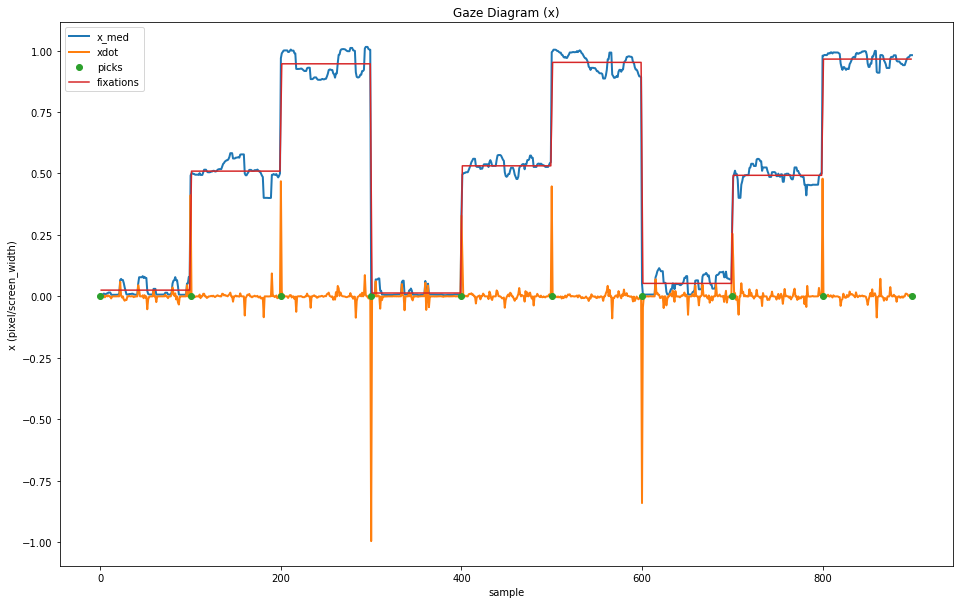

In [12]:
fig = plt.figure(figsize=(16, 10))
# plt.plot(x, linewidth=2, label="x")
# plt.plot(xdot2, linewidth=2, label="xdot2")
plt.plot(x_med, linewidth=2, label="x_med")
plt.plot(xdot, linewidth=2, label="xdot")
plt.plot(x_picks_smp, x_picks, "o", label="picks")
plt.plot(x_fix_smp, x_fix, label="fixations")
# plt.plot(s, y_boi, "o", color="g", markersize=2, label="boi")
plt.legend()
plt.title("Gaze Diagram (x)")
plt.xlabel("sample")
plt.ylabel("x (pixel/screen_width)")

In [13]:
y_picks_smp = []
y_picks = []
ydot_thresh = 0.15
ydot_picks_p = ydot > ydot_thresh
ydot_picks_n = ydot < -ydot_thresh
ydot_picks = ydot_picks_p + ydot_picks_n
ydot_picks[0] = True
ydot_picks[-1] = True
i = 0
while i < n_smp:
    if ydot_picks[i]:
        y_picks_smp.append(i)
        y_picks.append(0)
        for j in range(i+1, i+pick_win):
            if j < n_smp:
                ydot_picks[j] = False
            else:
                break
        i = j
    else:
        i += 1

y_picks_smp = np.array(y_picks_smp)
y_picks = np.array(y_picks)

In [14]:
y_fix_smp = np.array([1])
y_fix = np.array([1])
i = 0
for (i, _) in enumerate(y_picks_smp):
    if i == y_picks_smp.shape[0]-1:
        break
    y_fix_i_smp = np.arange(y_picks_smp[i]+1, y_picks_smp[i+1])
    y_fix_i = np.ones(y_fix_i_smp.shape[0]) * np.mean(y_med[y_fix_i_smp])
    y_fix_smp = np.concatenate((y_fix_smp, y_fix_i_smp))
    y_fix = np.concatenate((y_fix, y_fix_i))

y_fix_smp = y_fix_smp[1:]
y_fix = y_fix[1:]

Text(0, 0.5, 'y (pixel/screen_width)')

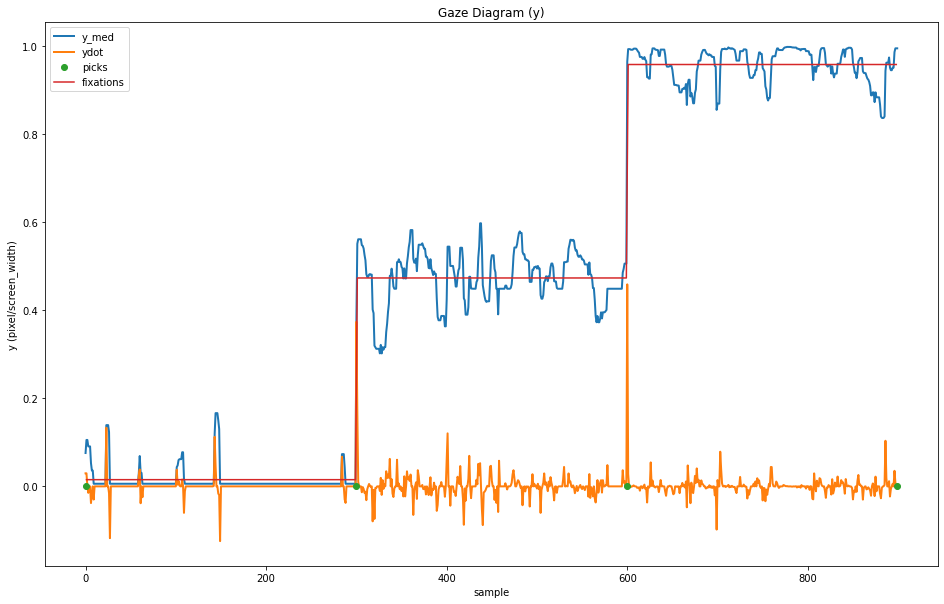

In [15]:
fig = plt.figure(figsize=(16, 10))
# plt.plot(y, linewidth=2, label="y")
plt.plot(y_med, linewidth=2, label="y_med")
plt.plot(ydot, linewidth=2, label="ydot")
# plt.plot(ydot, linewidth=2, label="ydot")
plt.plot(y_picks_smp, y_picks, "o", label="picks")
plt.plot(y_fix_smp, y_fix, label="fixations")

# plt.plot(t, y_boi, "o", color="g", markersize=2, label="boi")
plt.legend()
plt.title("Gaze Diagram (y)")
plt.xlabel("sample")
plt.ylabel("y (pixel/screen_width)")

In [16]:
y_et_med = np.concatenate((x_med, y_med), 1)
with open(sampling_test_dir + "y-hat-et-flt.pickle", 'rb') as f:
    pickle.dump(y_et_med, f)

AxisError: axis 1 is out of bounds for array of dimension 1